<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/HW%26/LRtestAndMCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by FBB for DSPS 2019
# HW 7

# **PART** I Due Tuesday 10/22 at midnight

Read in the abstract, first paragaph of the main text and page three of [Nam et al. 2018](https://arxiv.org/pdf/1811.10212.pdf) which should be sufficient to give you an idea of the problem context., 

# 1 Get the data 
from the Harvard Dataverse open data repository (well curated and organized open data repositories are a blessing in science and data science - they enable reproducibility! - This one is a great one.)

Use ```wget``` and the link in the paper (page 17). YOu want the data for Fig 1 insert G.


In [3]:
#mounting google drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
# from scipy import optimize
from scipy.optimize import curve_fit

In [0]:
#downloading data as a file nam18
!wget -O nam18 "https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/9QKJU2/WOMIZQ"

--2019-10-25 13:33:52--  https://dataverse.harvard.edu/api/access/datafile/:persistentId?persistentId=doi:10.7910/DVN/9QKJU2/WOMIZQ
Resolving dataverse.harvard.edu (dataverse.harvard.edu)... 206.191.184.198
Connecting to dataverse.harvard.edu (dataverse.harvard.edu)|206.191.184.198|:443... 

In [0]:
#moving file to folder data
!mv nam18 "drive/My Drive/dsps/data"

In [0]:
ls "drive/My Drive/dsps/data"

jla_likelihood_v6/  nam18


In [12]:
#importing data as a pandas dataframe
nam18=pd.read_csv("drive/My Drive/dsps/data/nam18", sep="\t", header= None)
nam18 = nam18.apply(pd.to_numeric, errors='coerce') # Converting non numeric values to NAN
nam18.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.247,0.000000,0.114,NaN,1.998,-0.6682,0.236,NaN,NaN,0.0,0.000000
1,0.270,0.264431,0.291,NaN,3.008,0.0000,1.640,0.000,NaN,1.0,0.000163
2,0.290,0.247896,0.290,NaN,4.013,1.1170,2.500,0.200,NaN,1.5,0.007934
3,0.330,0.232262,0.330,NaN,5.006,2.4760,3.999,1.538,NaN,2.0,0.058189
4,0.379,0.233420,0.380,NaN,6.015,4.4130,5.000,2.866,NaN,2.5,0.198115


# Data Wrangling and visualization



Write *a single line of code* that does the following (in whichever order you want):

- removes all columns you do not need. 
- removes Nan values that appear in the relevant columns.
- renames the columns according to the notation on in the paper figure (Fig 1 insert G)

Writing this in a single line of code is the "pythonic" way to do it - meaning its in the conding style of the language. You can do it by concatenating methods that do wach step, like ```df.method1(...).method2(...).method3(...)```
and as long as each method returns a dataframe another method can be appended. The code will be run left to right with the next method running on the dataframe returned by the previous one.

Note that you can use latex notation for the lables, e.g.:
```str=r"\Delta^2"```
would look like what you wrote when you look at the column names, but would look like 

$\Delta^2$ 

in the plot label if plotting with df.plot()



In [13]:
#selecting useful columns, dropping off NaN values and renaming columns names according to the reference paper.
nam18_reducted = nam18[[0,1]].dropna().rename(columns={0:r"$T(K)$", 1:r"$n^* (10^9 cm^{-2})$"})
nam18_reducted.head()

,$T(K)$,$n^* (10^9 cm^{-2})$
0,0.247,0.000000
1,0.270,0.264431
2,0.290,0.247896
3,0.330,0.232262
4,0.379,0.233420


### Tried to convert the columns name into latex format but not working. We will change the names in the following plot.


In [0]:
nam18_reducted = nam18_reducted.rename(columns={r"$T(K)$":"T", r"$n^* (10^9 cm^{-2})$":"n"})

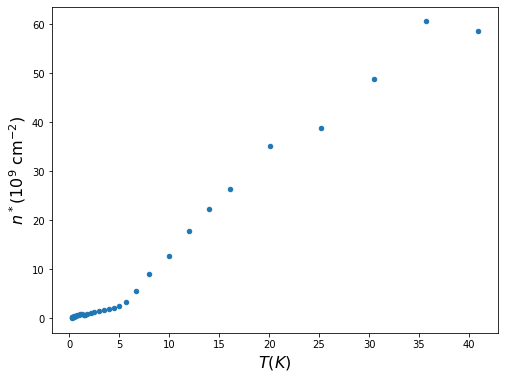

In [0]:
#plotting scatter plot of electron density against temperature
ax = pl.figure(figsize = (8,6)).add_subplot(111)
nam18_reducted.plot(kind="scatter",x="T", y="n", ax=ax)
ax.set_xlabel(r"$T(K)$", fontsize=16)
ax.set_ylabel(r"$n^*(10^9$ cm$^{-2})$", fontsize=16);
#pl.legend()

###Figure 1: Plot of charge carrier number density against temperature. The density increases with temperature with a transition at T = 12 K.

In [0]:
x_vals = nam18_reducted["T"].values
y_vals = nam18_reducted["n"].values

# 677 and Extra Credit

Create a function that generates a polynomial of any degree.

Functions can take variable number of arguments if passed as a tuple with a * (this is a pointer. If you coded in C you know this syntax.)

What I mean by that is that I can create a function as:


In [0]:
def unspecifiedArgumentFunction(*a):
  print ("the number of elements passed in argument 'a' is: ", len(a))
  for i in range(len(a)):
    print ("Argument {} is {}".format(i, a[i]))
           
unspecifiedArgumentFunction(*[0,1,2])          

the number of elements passed in argument 'a' is:  3
Argument 0 is 0
Argument 1 is 1
Argument 2 is 2


In [0]:
unspecifiedArgumentFunction(*["hello", [0,1,2]])          

the number of elements passed in argument 'a' is:  2
Argument 0 is hello
Argument 1 is [0, 1, 2]


So based on this create a function that takes the _x_ vector (exogenous variable) and a pointer to n coefficients. Those will be the parameters of the polynomial and it will be a list of 2 elements for a line (slope and intercept), of 3 elements for a second degree polynomial, 4 for a third etc etc. Fit this with scipy.optimize.curve_fit fitting a polynomial of 1st (line), 2nd (parabola), and 3rd degree.

In [0]:
#defining a polynomial
def polynomial1(x, c):
  '''
  Function to create polynomials of variable coefficients, 
  '''
  c = np.array(c, ndmin=1, copy=0)
  x = np.asarray(x)
  c0 = c[-1] + x*0
  for i in range(2, len(c) + 1):
    c0 = c[-i] + c0*x
  return c0

### The above funciton is one way to write the polynomial function, but we want to use pointers, so the following function will do the job for us.

In [0]:
def polynomial(x, *c):
    '''
    Function to generate polynomials.
    It will take a vector and number of coefficients as input
    and return a polynomail of that degree
    '''
    
    poly = 0
    for i, val in enumerate(c):
        poly += x**i * val
    return poly

### Fitting the polynomial
1- fitting a one degree poly

In [0]:
popt_1, pcov_1 = curve_fit(polynomial, x_vals, y_vals, p0=[1, 0])

2- Fitting 2nd degree poly

In [0]:
popt_2, pcov_2 = curve_fit(polynomial, x_vals, y_vals, p0=[1, 0, 0])

3- Fitting 3rd degree poly

In [0]:
popt_3, pcov_3 = curve_fit(polynomial, x_vals, y_vals, p0=[1, 0, 0, 0])

# 3 Model

Use the statsmodels.formula.api package to run Ordinary Linear Fits (ols) and fit a line, a second degree polynomial and a third degree polynomial to the data. For each model extract the log-likelihood and print it out explicitally for each mode. How do the lof-likelihoods compare for the three models? does it make sense? explain. Just by reading the log-likelihood value can you say which model is better? Discuss

Note: if you followed the instructions and renamed variables as I asked you to above, you will encounter an issue here, Although pandas know how to render the string in the plot, statsmodels has issues with parsing a complex string with characters such as "(" or latex inputs.

In [0]:
from statsmodels.formula import api as smf

In [0]:
#Ordinary linear fit for linear model
model1 = smf.ols('n ~ T', data=nam18_reducted).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           2.03e-30
Time:                        23:56:38   Log-Likelihood:                -78.878
No. Observations:                  35   AIC:                             161.8
Df Residuals:                      33   BIC:                             164.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8884      0.492     -3.841      0.001      -2.889      -0.888
T              1.6176      0.038     42.577      0.000       1.540       1.695
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.041
Skew:                          -0.420   Prob(JB):                        0.594
Kurtosis:                       2.905   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
nam18_reducted['x2'] = nam18_reducted["T"]**2

In [0]:
#Ordinary linear fit for quadratic model
model2 = smf.ols('n ~ x2 + T', data=nam18_reducted).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     879.5
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           1.08e-28
Time:                        23:56:53   Log-Likelihood:                -78.866
No. Observations:                  35   AIC:                             163.7
Df Residuals:                      32   BIC:                             168.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9344      0.592     -3.266      0.003      -3.141      -0.728
x2            -0.0005      0.004     -0.144      0.886      -0.008       0.007
T              1.6354      0.129     12.652      0.000       1.372       1.899
==============================================================================
Omnibus:                        1.219   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                0.984
Skew:                          -0.399   Prob(JB):                        0.611
Kurtosis:                       2.809   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
nam18_reducted['x3'] = nam18_reducted["T"]**3

In [0]:
#Ordinary linear fit for cubic model
model3 = smf.ols('n ~ x3 + x2 + T', data=nam18_reducted).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      n   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1433.
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           2.54e-33
Time:                        23:57:02   Log-Likelihood:                -62.858
No. Observations:                  35   AIC:                             133.7
Df Residuals:                      31   BIC:                             139.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4186      0.441     -0.949      0.350      -1.318       0.481
x3            -0.0015      0.000     -6.811      0.000      -0.002      -0.001
x2             0.0827      0.012      6.649      0.000       0.057       0.108
T              0.5900      0.175      3.380      0.002       0.234       0.946
==============================================================================
Omnibus:                        3.084   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                1.813
Skew:                          -0.397   Prob(JB):                        0.404
Kurtosis:                       3.784   Cond. No.                     2.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
llfModel1 =  round(model1.llf, 2) ## rounding the Log-Likelihood for different model up to two digits
llfModel2 = round(model2.llf, 2)
llfModel3 = round(model3.llf, 2)

In [0]:
print("line model log-likelihood: {}".format(llfModel1))
print("parabola model log-likelihood: {} ".format(llfModel2))
print("order 3 polynomial model log-likelihood: {}".format(llfModel3))

line model log-likelihood: -78.88
parabola model log-likelihood: -78.87 
order 3 polynomial model log-likelihood: -62.86


# 4 plot the three models over the data. Use the polynomial function you created in the 667/EC if you did. 
Make sure you create a new x vector that samples densely the range spanned by the temperature variabla in your data, or your models, which should be plotted with lines, will look broken-up

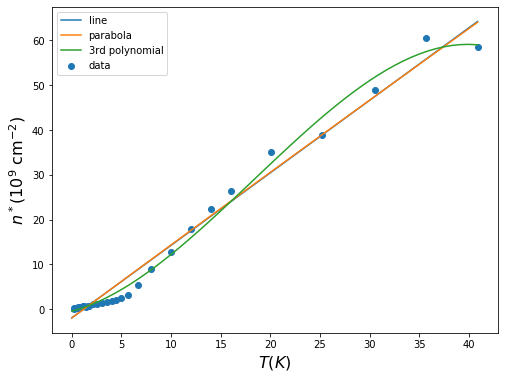

In [0]:
# creating x-axis values
x_axis = np.linspace(0, nam18_reducted['T'].max(), 50)
# Plotting the data and fit it with different polynomial

pl.figure(figsize=(8, 6))

pl.scatter(x_vals, y_vals, label='data') ## actual data

pl.plot(x_axis, polynomial(x_axis, *popt_1), label='line')
pl.plot(x_axis, polynomial(x_axis, *popt_2), label='parabola')
pl.plot(x_axis, polynomial(x_axis, *popt_3), label='3rd polynomial');
pl.legend()
pl.xlabel(r"$T(K)$", fontsize=16)
pl.ylabel(r"$n^*(10^9$ cm$^{-2})$", fontsize=16);

# 5 *formally* compare the models with a test that returns a p-value assessment (NHRT) to determine which model is best. Sort the models from the best one to the worse one.

In [0]:
#Calculating log likelihood ratio between linear and quadratic model
llr = model2.compare_lr_test(model1)

lr1 = llr[0]

if (sp.stats.chi2.ppf(0.997, 1) > lr1): 
    print ("I cannot reject the Null that model1 (linear model) is better than the complex model (quadratic model)")
else:
    print ("The Null that the simpler model is better than the complex model is rejected")

I cannot reject the Null that model1 (linear model) is better than the complex model (quadratic model)


In [0]:
#Calculating log likelihood ratio between linear and cubic model
llr2 = model3.compare_lr_test(model1)

if (sp.stats.chi2.ppf(0.997, 1) > llr2[0]): 
    print ("I cannot reject the Null that model1 (linear model) is better than the complex model (cubic model)")
    
else:
    print ("The Null that the simpler model (linear model) is better than the complex model (cubic model) is rejected")

The Null that the simpler model (linear model) is better than the complex model (cubic model) is rejected


In [0]:
print("The best model is polynomial of order 3 which fits the data best.")

The best model is polynomial of order 3 which fits the data best.


###  The null hypothesis that simpler linear or quadratic models are better is rejected at 3 sigma.

### Install emcee

In [25]:
!pip install emcee


     |████████████████████████████████| 61kB 1.9MB/s 


# **PART** II Due Friday 10/25 at midnight

# 6. Create a column with made up uncertainties: draw them as gaussian random variables from a gaussian centered at 0 and with a standard deviation of 10

In [0]:
n = len(nam18_reducted) #no of rows in the data

In [0]:
#generating random uncertainities
np.random.seed(123)
nam18_reducted["uncertainties"] = np.random.randn(n)*10

In [0]:
nam18_reducted.head()

,T,n,uncertainties
0,0.247,0.000000,-10.856306
1,0.270,0.264431,9.973454
2,0.290,0.247896,2.829785
3,0.330,0.232262,-15.062947
4,0.379,0.233420,-5.786003


# 7. Set up EMCEE for a MCMC model optimization

Create a log-likelihood function like in the example https://emcee.readthedocs.io/en/stable/tutorials/line/. Note that the model generatedin the emcee example is assuming a line model but also assuming that the uncertainties are underestimated! That is a really fun exrcise! however, you do not have to do this part: modify the likelihood function (and prior etc) removing the piece referring to the uncertainty underestimation. Set a prior that limits the slpe to positive values and the intercept to values between -10 and 10.

In [26]:
import emcee
print(emcee.__version__)

3.0.0


In [0]:
## some functions following the example in the tutorial
def log_likelihood(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    sigma2 = yerr**2 
    return -0.5*np.sum((y-model)**2/sigma2 + np.log(sigma2))

In [0]:
def log_prior(theta):
    m, b = theta
    if 0.0 < m  and -10.0 < b < 10.0: ## setting the limits on slope and intersept
        return 0.0
    return -np.inf

In [0]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

# 8 Run the emcee with 50 walkers and chains 3000 elements long

In [0]:
walkers = 50

ndim = 2    # number of parameters which are two in our case

x = nam18_reducted["T"].values
y = nam18_reducted["n"].values

yerr = nam18_reducted.uncertainties.values

sampler = emcee.EnsembleSampler(walkers, ndim, log_probability, args=(x, y, yerr)) # where the second option given is the no of parameters

m0, b0 = 1, -1

# initial parameters for 50 walkers, nwalker*ndim

pos =np.array([m0, b0]) + np.abs( np.random.randn(walkers, 2) ) 

sampler.run_mcmc(initial_state=pos, nsteps=3000, progress=True);

100%|██████████| 3000/3000 [00:06<00:00, 490.81it/s]


# 9. plot the chains for slope and intercept, labelled accordingly. Remove from the chain the first 50 points. Discuss why that is a good idea.

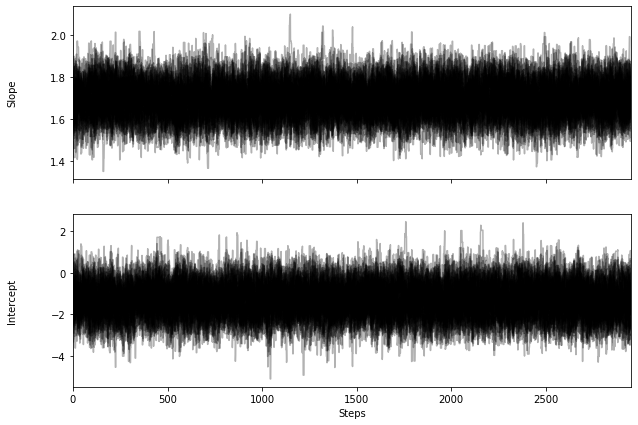

In [0]:
fig, axes = pl.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
samples2 = samples[50:]  ## Removing first 50 points
axes[0].plot(samples2[:,:, 0], "k", alpha=0.3)
axes[0].set_xlim(0, len(samples2))
axes[0].set_ylabel("Slope")
axes[0].yaxis.set_label_coords(-0.1, 0.5)
axes[1].plot(samples2[:,:, 1], "k", alpha=0.3)
axes[1].set_xlim(0, len(samples2))
axes[1].set_ylabel("Intercept")
axes[1].yaxis.set_label_coords(-0.1, 0.5)
axes[1].set_xlabel("Steps");

Removing the first 50 points made a lot of difference in the symmetricity of the plot. The plot now looks symmetric about -1.5 while it was not the case if we also include the first 50 points. Maybe for the first 50 points the the initial guess for this method is very far from the true value. 

# Install the corner module

In [30]:
!pip install corner
import corner


  Created wheel for corner: filename=corner-2.0.1-cp36-none-any.whl size=11643 sha256=72190eb59d2c2ac37581a76a8bf6ceb27bdf23a8ef26416ddc9d9911d9f0c2a7
  Stored in directory: /root/.cache/pip/wheels/70/d8/e5/e0e7974a2a5757483ea5a180c937041cf6872dc9993d78234a
Successfully built corner


# 10 plot the "marginalized posterior distributions" with the corner plot package
label the axis "slope" and "intercept" appropriately

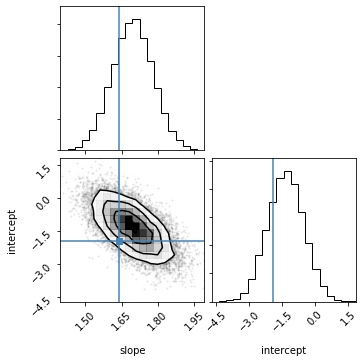

In [0]:
# We want to Flatten the chain across the ensemble
# Also discarding the first 50 steps in the chain as discussed above
## Thin option will take every nth (given) step from the chain
Sample_flat = sampler.get_chain(discard=50, thin=10, flat=True) 
# Plotting the figure
fig = corner.corner(Sample_flat, labels=['slope', 'intercept'], truths=[1.64, -1.94])

#  EC Repeat for a parabola fit (this should be very quick now that you did the line fit! you need to define a new slightly different likelihood and prior, )

In [0]:
## some functions following the example in the tutorial
def log_likelihood2(theta, x, y, yerr):
    a, b, c = theta
    model = a* x**2 + b* x + c ## parabolic model
    sigma2 = yerr**2 ## uncertanity 
    
    return -0.5*np.sum((y-model)**2/sigma2 + np.log(sigma2))

In [0]:
def log_prior2(theta):
    a, b, c = theta
    if -100 <a  and -100.0 < b < 100.0 and -100.0 < c < 100.0: ## setting the limits 
        return 0.0
    return -np.inf

In [0]:
def log_probability2(theta, x, y, yerr):
    lp = log_prior2(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood2(theta, x, y, yerr)

In [27]:
walkers = 50

ndim = 3    # number of parameters

x = nam18_reducted["T"].values
y = nam18_reducted["n"].values

yerr = nam18_reducted.uncertainties.values

sampler = emcee.EnsembleSampler(walkers, ndim, log_probability2, args=(x, y, yerr)) # where the second option given is the no of parameters

a0, b0, c0 = 1, -1, 1

# initial parameters for 50 walkers, nwalker*ndim

pos = np.array([a0, b0, c0]) + np.abs( np.random.randn(walkers, ndim) ) 

sampler.run_mcmc(initial_state=pos, nsteps=3000, progress=True);

100%|██████████| 3000/3000 [00:08<00:00, 354.63it/s]


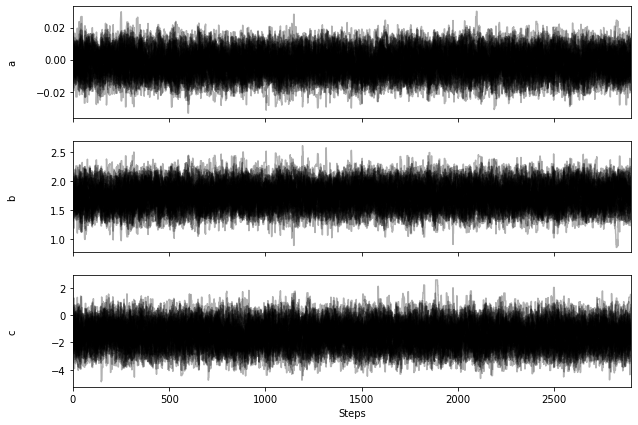

In [28]:
fig, axes = pl.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
samples = samples[100:]  # Removing the first 100 steps
labels = ["a", "b", "c"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("Steps");

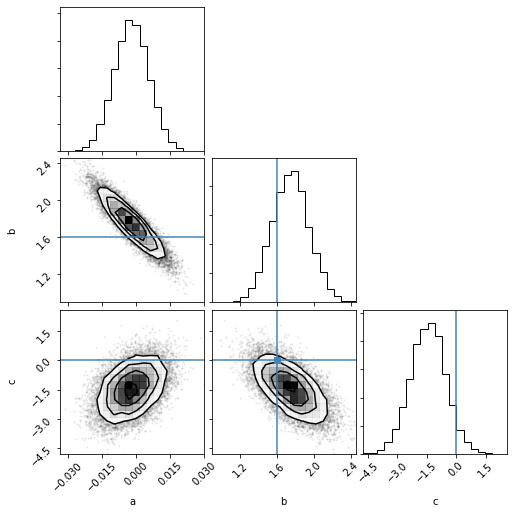

In [32]:
sample_quad = sampler.get_chain(discard=100, thin=10, flat=True)
fig = corner.corner(sample_quad, labels=['a', 'b','c'], truths=[-1.9, 1.6, -0.00052])